# MLOps. Практическое задание №5

In [1]:
# Импорт необходимых библиотек
# Работа с массивами и генерация данных
import numpy as np
# Лингейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Отрисовка графиков
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Создание качественных датасетов для обучения модели линейной регрессии

# Зафиксируем повторяемый результат
np.random.seed(42)

# Датасет 1
X1 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y1 = (1 * X1 + var).reshape(-1, 1)

# Датасет 2
X2 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y2 = 1 * X2 + var

# Датасет 3
X3 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y3 = 1 * X3 + var

print(f"X:{X1[:10]}")
print(f"Y:{Y1[:10]}")

X:[ 0.          2.04081633  4.08163265  6.12244898  8.16326531 10.20408163
 12.24489796 14.28571429 16.32653061 18.36734694]
Y:[[ 3.74540119]
 [11.54795939]
 [11.40157207]
 [12.10903382]
 [ 9.72345171]
 [11.76402684]
 [12.82573408]
 [22.94747574]
 [22.33768073]
 [25.44807272]]


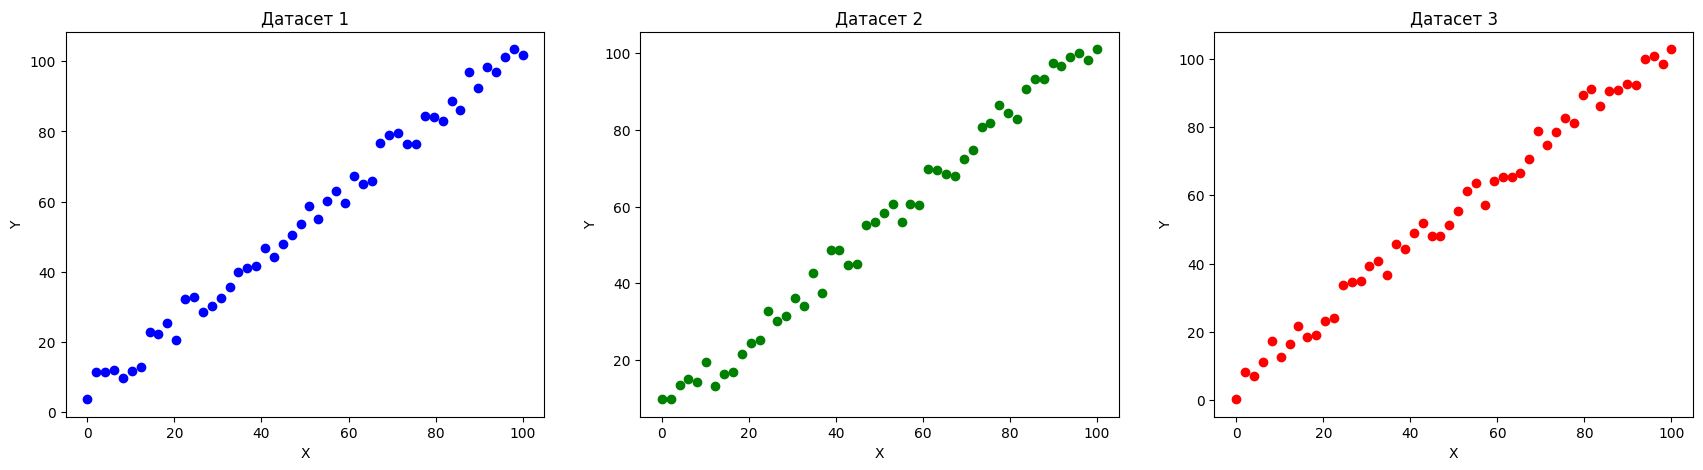

In [3]:
# Визуализация отношения между входным признаком Х и целевой переменной Y

# Создаем фигуру и две координатные плоскости
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))  # Устанавливаем размер фигуры 21x5

# Отображаем данные на первой координатной плоскости
ax1.scatter(X1, Y1, color='b')  # Синий цвет
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Датасет 1')

# Отображаем данные на второй координатной плоскости
ax2.scatter(X2, Y2, color='g')  # Зеленый цвет
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Датасет 2')

# Отображаем данные на второй координатной плоскости
ax3.scatter(X3, Y3, color='r')  # Красный цвет
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Датасет 3')

# Показываем графики
plt.show()

In [4]:
# Перед обучением модели признаки необходимо привести из одномерного массива к двумерному
X1, X2, X3 = X1.reshape(-1, 1), X2.reshape(-1, 1), X3.reshape(-1, 1)

In [5]:
# Обучение модели линейной регрессии на наборе данных 1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

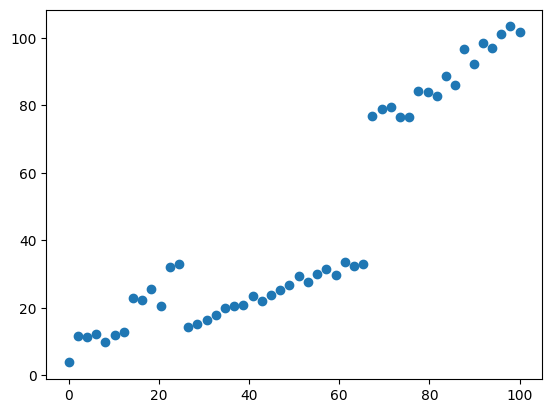

In [6]:
# "Испортим" шумом набор 1
Y1[13:33] *= 0.5
plt.scatter(X1, Y1)

In [7]:
# Тестирование модели на нормальных данных
Y2_predict = model.predict(X2)
Y3_predict = model.predict(X3)
# Тестирование модели на испорченных данных
Y1_predict = model.predict(X1)

In [8]:
# Посчитаем метрику r2 (коэффициент детерминации)
ds2_r2 = r2_score(Y2, Y2_predict)
ds3_r2 = r2_score(Y3, Y3_predict)
corr_ds1_r2 = r2_score(Y1, Y1_predict)
print(f"r2 на качественном наборе данных {ds2_r2}")
print(f"r2 на качественном наборе данных {ds3_r2}")
print(f"r2 на испорченном наборе данных {corr_ds1_r2}")

r2 на качественном наборе данных 0.9890924560423089
r2 на качественном наборе данных 0.9898740574450577
r2 на испорченном наборе данных 0.7339251455859082


На качественных наборах данных коэффициент детерминации приближается к 1.0 (в реальности выше 0.96). На недостоверных данных коэффициент детерминации заметно снижается (принимает значение ниже 0.9).

# Сохранение программного кода в файл app.py

In [9]:
%%writefile sample_data/app.py
# Импорт необходимых библитотек
# Работа с массивами и генерация данных
import numpy as np
# Лингейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Отрисовка графиков
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Создание качественных датасетов для обучения модели линейной регрессии

# Зафиксируем повторяемый результат
np.random.seed(42)

# Датасет 1
X1 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y1 = (1 * X1 + var).reshape(-1, 1)

# Датасет 2
X2 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y2 = 1 * X2 + var

# Датасет 3
X3 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y3 = 1 * X3 + var

# Перед обучением модели данные необходимо привести из одномерного массива к двумерному
X1, X2, X3 = X1.reshape(-1, 1), X2.reshape(-1, 1), X3.reshape(-1, 1)

# Обучение модели линейной регрессии на наборе данных 1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# "Испортим" шумом набор 1
Y1[15:35] *= 0.7

# Тестирование модели на нормальных данных
Y2_predict = model.predict(X2)
Y3_predict = model.predict(X3)
# Тестирование модели на испорченных данных
Y1_predict = model.predict(X1)

# Анализ с помощью Pytest
def test_predictions_corr_ds1():
   assert r2_score(Y1, Y1_predict) > 0.9, "Модель имеет проблемы с набором данных 1"

def test_predictions_ds2():
    assert r2_score(Y2, Y2_predict) > 0.9, "Модель имеет проблемы с набором данных 2"

def test_predictions_ds3():
    assert r2_score(Y3, Y3_predict) > 0.9, "Модель имеет проблемы с набором данных 3"

Writing sample_data/app.py


# Тестирование модели

In [10]:
!pytest -v sample_data/app.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                                                  

sample_data/app.py::test_predictions_corr_ds1 FAILED                                         [ 33%]
sample_data/app.py::test_predictions_ds2 PASSED                                              [ 66%]
sample_data/app.py::test_predictions_ds3 PASSED                                              [100%]

============================================= FAILURES =============================================
____________________________________ test_predictions_corr_ds1 _____________________________________

    def test_predictions_corr_ds1():
>      assert r2_score(Y1, Y1_predict) > 0.9, "Модель имеет проблемы с набором данных 1"
E      AssertionError: М